The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


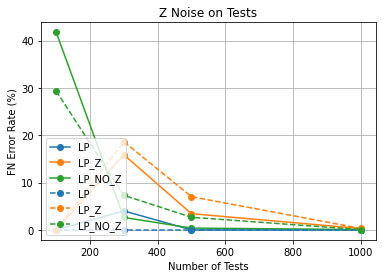

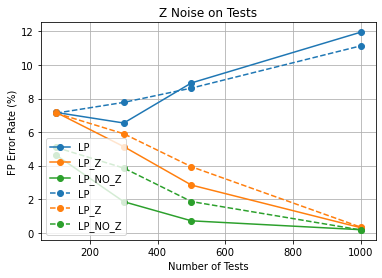

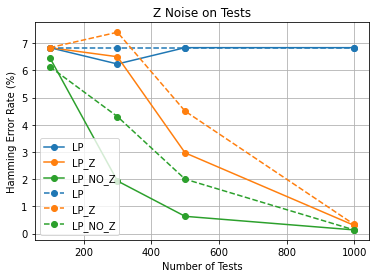

In [135]:
from MyDecoder import * #_cvxpy
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload

N = 1000
q = 0.1
p = 0.8
m = 200

test_setSize = np.array([100,300,500,1000])

p_noisy = [0.1,0.2] # Noises
n_runs = 100  # Runs 

#fig_filename = "Z_Noise_nonOverlap_0p1_0p8_200"
Title_fig = f"Z Noise on Tests q={q} p={p} m={m}"

linestyle = ['o-', 'o--']
linecolor = ['tab:blue','tab:orange','tab:green' ]


n_n = np.shape(p_noisy)[0]
predictAcc = np.zeros((3,test_setSize.shape[0],n_n))
predictAcc_noisy_z = np.zeros((3,test_setSize.shape[0],n_n))
predictAcc_noisy_z_nonoverlapping = np.zeros((3,test_setSize.shape[0],n_n))

for i_n, i_noise in enumerate(p_noisy):

    counter = 0

    for i_test in test_setSize:

        temp_MEAN_predictAcc = np.zeros(n_runs)    
        temp_MEAN_predictAcc_noisy_z = np.zeros(n_runs)
        temp_MEAN_predictAcc_noisy_z_nonoverlapping  = np.zeros(n_runs)

        for i_run in np.arange(n_runs):
            np.random.seed(i_run)

            [X,ppl, y, A] = generator_nonoverlapping(N, q, p, m, i_test)
            
            y = add_noise_zchannel(y,i_noise)

            pred_s = lp_nonoverlapping(X,y,A.copy())
            temp_FP,temp_FN,temp_Hamming = get_stats(ppl, pred_s)
            predictAcc[0,counter,i_n] = predictAcc[0,counter,i_n]+temp_FN/np.sum(ppl)
            predictAcc[1,counter,i_n] = predictAcc[1,counter,i_n]+temp_FP/(N-np.sum(ppl))
            predictAcc[2,counter,i_n] = predictAcc[2,counter,i_n]+temp_Hamming/N

            pred_s = lp_noisy_z(X,y)
            temp_FP,temp_FN,temp_Hamming = get_stats(ppl, pred_s)
            predictAcc_noisy_z[0,counter,i_n] = predictAcc_noisy_z[0,counter,i_n]+temp_FN/np.sum(ppl)
            predictAcc_noisy_z[1,counter,i_n] = predictAcc_noisy_z[1,counter,i_n]+temp_FP/(N-np.sum(ppl))
            predictAcc_noisy_z[2,counter,i_n] = predictAcc_noisy_z[2,counter,i_n]+temp_Hamming/N

            pred_s = lp_noisy_z_nonoverlapping(X,y,A.copy())
            temp_FP,temp_FN,temp_Hamming =  get_stats(ppl, pred_s)
            predictAcc_noisy_z_nonoverlapping[0,counter,i_n] = predictAcc_noisy_z_nonoverlapping[0,counter,i_n]+temp_FN/np.sum(ppl)
            predictAcc_noisy_z_nonoverlapping[1,counter,i_n] = predictAcc_noisy_z_nonoverlapping[1,counter,i_n]+temp_FP/(N-np.sum(ppl))
            predictAcc_noisy_z_nonoverlapping[2,counter,i_n] = predictAcc_noisy_z_nonoverlapping[2,counter,i_n]+temp_Hamming/N

        counter += 1
        
        
        
predictAcc = predictAcc/n_runs
predictAcc_noisy_z = predictAcc_noisy_z/n_runs
predictAcc_noisy_z_nonoverlapping = predictAcc_noisy_z_nonoverlapping/n_runs





plt.figure()
plt.plot(test_setSize, predictAcc[0,:,0]*100,linestyle[0],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_z[0,:,0]*100,linestyle[0],label='LP_Z', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_z_nonoverlapping[0,:,0]*100,linestyle[0],label='LP_NO_Z', color=linecolor[2])
plt.plot(test_setSize, predictAcc[0,:,1]*100,linestyle[1],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_z[0,:,1]*100,linestyle[1],label='LP_Z', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_z_nonoverlapping[0,:,1]*100,linestyle[1],label='LP_NO_Z', color=linecolor[2])


plt.title(Title_fig)
plt.xlabel("Number of Tests")
plt.ylabel("FN Error Rate (%)")
plt.grid(True)
plt.legend( loc='lower left')
#plt.savefig(fig_filename+"_FP"+".png", dpi=150)

plt.figure()
plt.plot(test_setSize, predictAcc[1,:,0]*100,linestyle[0],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_z[1,:,0]*100,linestyle[0],label='LP_Z', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_z_nonoverlapping[1,:,0]*100,linestyle[0],label='LP_NO_Z', color=linecolor[2])
plt.plot(test_setSize, predictAcc[1,:,1]*100,linestyle[1],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_z[1,:,1]*100,linestyle[1],label='LP_Z', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_z_nonoverlapping[1,:,1]*100,linestyle[1],label='LP_NO_Z', color=linecolor[2])

plt.title(Title_fig)
plt.xlabel("Number of Tests")
plt.ylabel("FP Error Rate (%)")
plt.grid(True)
plt.legend( loc='lower left')
#plt.savefig(fig_filename+"_FN"+".png", dpi=150)

plt.figure()
plt.plot(test_setSize, predictAcc[2,:,0]*100,linestyle[0],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_z[2,:,0]*100,linestyle[0],label='LP_Z', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_z_nonoverlapping[2,:,0]*100,linestyle[0],label='LP_NO_Z', color=linecolor[2])
plt.plot(test_setSize, predictAcc[2,:,1]*100,linestyle[1],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_z[2,:,1]*100,linestyle[1],label='LP_Z', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_z_nonoverlapping[2,:,1]*100,linestyle[1],label='LP_NO_Z', color=linecolor[2])

plt.title(Title_fig)
plt.xlabel("Number of Tests")
plt.ylabel("Hamming Error Rate (%)")
plt.grid(True)
plt.legend( loc='lower left')
#plt.savefig(fig_filename+"_HM"+".png", dpi=150)


In [ ]:
from MyDecoder import * #_cvxpy
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload

N = 1000
q = 0.1
p = 0.8
m = 200

test_setSize = np.array([100,300,500,1000])


p_noisy = [0.1,0.2]
n_runs = 100  # Runs 

fig_filename = "BSC_Noise_nonOverlap_0p1_0p8_200_2"
Title_fig = f"BSC Noise on Tests q={q} p={p} m={m}"

linestyle = ['o-', 'o--']
linecolor = ['tab:blue','tab:orange','tab:green' ]


n_n = np.shape(p_noisy)[0]
predictAcc = np.zeros((3,test_setSize.shape[0],n_n))
predictAcc_noisy_bsc = np.zeros((3,test_setSize.shape[0],n_n))
predictAcc_noisy_bsc_nonoverlapping = np.zeros((3,test_setSize.shape[0],n_n))

for i_n, i_noise in enumerate(p_noisy):

    counter = 0

    for i_test in test_setSize:

        temp_MEAN_predictAcc = np.zeros(n_runs)    
        temp_MEAN_predictAcc_noisy_z = np.zeros(n_runs)
        temp_MEAN_predictAcc_noisy_z_nonoverlapping  = np.zeros(n_runs)

        for i_run in np.arange(n_runs):
            np.random.seed(i_run)

            [X,ppl, y, A] = generator_nonoverlapping(N, q, p, m, i_test)
            y = add_noise_zchannel(y,i_noise)

            pred_s = lp_nonoverlapping(X,y,A.copy())
            temp_FP,temp_FN,temp_Hamming = get_stats(ppl, pred_s)
            predictAcc[0,counter,i_n] = predictAcc[0,counter,i_n]+temp_FN/np.sum(ppl)
            predictAcc[1,counter,i_n] = predictAcc[1,counter,i_n]+temp_FP/(N-np.sum(ppl))
            predictAcc[2,counter,i_n] = predictAcc[2,counter,i_n]+temp_Hamming/N

            pred_s = lp_noisy_bsc(X,y)
            temp_FP,temp_FN,temp_Hamming = get_stats(ppl, pred_s)
            predictAcc_noisy_bsc[0,counter,i_n] = predictAcc_noisy_bsc[0,counter,i_n]+temp_FN/np.sum(ppl)
            predictAcc_noisy_bsc[1,counter,i_n] = predictAcc_noisy_bsc[1,counter,i_n]+temp_FP/(N-np.sum(ppl))
            predictAcc_noisy_bsc[2,counter,i_n] = predictAcc_noisy_bsc[2,counter,i_n]+temp_Hamming/N

            pred_s = lp_noisy_bsc_nonoverlapping(X,y,A.copy())
            temp_FP,temp_FN,temp_Hamming =  get_stats(ppl, pred_s)
            predictAcc_noisy_bsc_nonoverlapping[0,counter,i_n] = predictAcc_noisy_bsc_nonoverlapping[0,counter,i_n]+temp_FN/np.sum(ppl)
            predictAcc_noisy_bsc_nonoverlapping[1,counter,i_n] = predictAcc_noisy_bsc_nonoverlapping[1,counter,i_n]+temp_FP/(N-np.sum(ppl))
            predictAcc_noisy_bsc_nonoverlapping[2,counter,i_n] = predictAcc_noisy_bsc_nonoverlapping[2,counter,i_n]+temp_Hamming/N

        counter += 1
        
        
        
predictAcc = predictAcc/n_runs
predictAcc_noisy_bsc = predictAcc_noisy_bsc/n_runs
predictAcc_noisy_bsc_nonoverlapping = predictAcc_noisy_bsc_nonoverlapping/n_runs





plt.figure()
plt.plot(test_setSize, predictAcc[0,:,0]*100,linestyle[0],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_bsc[0,:,0]*100,linestyle[0],label='LP_BSC', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_bsc_nonoverlapping[0,:,0]*100,linestyle[0],label='LP_NO_BSC', color=linecolor[2])
plt.plot(test_setSize, predictAcc[0,:,1]*100,linestyle[1],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_bsc[0,:,1]*100,linestyle[1],label='LP_BSC', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_bsc_nonoverlapping[0,:,1]*100,linestyle[1],label='LP_NO_BSC', color=linecolor[2])


plt.title(Title_fig)
plt.xlabel("Number of Tests")
plt.ylabel("FN Error Rate (%)")
plt.grid(True)
plt.legend( loc='lower left')
#plt.savefig(fig_filename+"_FP"+".png", dpi=150)

plt.figure()
plt.plot(test_setSize, predictAcc[1,:,0]*100,linestyle[0],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_bsc[1,:,0]*100,linestyle[0],label='LP_BSC', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_bsc_nonoverlapping[1,:,0]*100,linestyle[0],label='LP_NO_BSC', color=linecolor[2])
plt.plot(test_setSize, predictAcc[1,:,1]*100,linestyle[1],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_bsc[1,:,1]*100,linestyle[1],label='LP_BSC', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_bsc_nonoverlapping[1,:,1]*100,linestyle[1],label='LP_NO_BSC', color=linecolor[2])

plt.title(Title_fig)
plt.xlabel("Number of Tests")
plt.ylabel("FP Error Rate (%)")
plt.grid(True)
plt.legend( loc='lower left')
#plt.savefig(fig_filename+"_FN"+".png", dpi=150)

plt.figure()
plt.plot(test_setSize, predictAcc[2,:,0]*100,linestyle[0],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_bsc[2,:,0]*100,linestyle[0],label='LP_BSC', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_bsc_nonoverlapping[2,:,0]*100,linestyle[0],label='LP_NO_BSC', color=linecolor[2])
plt.plot(test_setSize, predictAcc[2,:,1]*100,linestyle[1],label='LP_NO', color=linecolor[0])
plt.plot(test_setSize, predictAcc_noisy_bsc[2,:,1]*100,linestyle[1],label='LP_BSC', color=linecolor[1])
plt.plot(test_setSize, predictAcc_noisy_bsc_nonoverlapping[2,:,1]*100,linestyle[1],label='LP_NO_BSC', color=linecolor[2])

plt.title(Title_fig)
plt.xlabel("Number of Tests")
plt.ylabel("Hamming Error Rate (%)")
plt.grid(True)
plt.legend( loc='lower left')
#plt.savefig(fig_filename+"_HM"+".png", dpi=150)
